In [1]:
#HomeWork1 
#considerando la collezione sperimentale TREC7 composto da ~528000 documenti, 50 topic e un pool con 2 gradi di rilevanza: R, NR.
#viene utilizzato trec_eval di Terrier per effettuare la valutazione, ottenendo i valori di:
#map: dal campo map all
#mean precision@10: dal campo P_10 all
#mean rprec: da rprec all vengono caricati i vettori che contengono le misure su cui vengono effettuati i test.
#le run eseguite sono:
#run 0: Stoplist, Porter stemmer, BM25
#run1: Stoplist, Porter stemmer, TF*IDF
#run 2: No stoplist, Porter Stemmer, BM25
#run3: No stoplist, No stemmer, TF*IDF

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import MultiComparison

#importo le run
#apro la valutazione 1 con BM25 con porter stemmer e stoplist
val1 = open("C:\\Users\\user\\Downloads\\terrier-core-4.4-bin\\terrier-core-4.4\\var\\valutazioni\\valbm250.txt", "r")
linea =val1.readlines()
mapBM250=[]
p10BM250=[]
rprecBM250=[]
#variabili per gli all
mapaBM250=[]
p10aBM250=[]
rprecaBM250=[]
#splitto e stampo
for indice in range(len(linea)):
    riga = linea[indice]
    rigam = riga.split()
    
    #prendo solo i map, p10 e rprec senza i map all
    if (rigam[0]=="map") and (rigam[1]!="all"):
        mapBM250.append(rigam[2])
    if (rigam[0]=="P_10") and (rigam[1]!="all"):
        p10BM250.append(rigam[2])
    if (rigam[0]=="Rprec") and (rigam[1]!="all"):
        rprecBM250.append(rigam[2])
        
    #prendo tutti i map,, p10 e rprec compresi i map all
    if (rigam[0]=="map") and (rigam[1]=="all"):
        mapaBM250.append(rigam[2])
    if (rigam[0]=="P_10") and (rigam[1]=="all"):
        p10aBM250.append(rigam[2])
    if (rigam[0]=="Rprec") and (rigam[1]=="all"):
        rprecaBM250.append(rigam[2])
        
        
        
#apro la valutazione 2 con TDF1 con porter stemmer e stoplist
val2 = open("C:\\Users\\user\\Downloads\\terrier-core-4.4-bin\\terrier-core-4.4\\var\\valutazioni\\valtfidf1.txt", "r")
linea =val2.readlines()
mapTDF1=[]
p10TDF1=[]
rprecTDF1=[]

mapaTDF1=[]
p10aTDF1=[]
rprecaTDF1=[]
#splitto e stampo 
for indice in range(len(linea)):
    riga = linea[indice]
    rigam = riga.split()
    
    #prendo i map, p10 e rprec senza all
    if (rigam[0]=="map") and (rigam[1]!="all"):
        mapTDF1.append(rigam[2])
    if (rigam[0]=="P_10") and (rigam[1]!="all"):
        p10TDF1.append(rigam[2])
    if (rigam[0]=="Rprec") and (rigam[1]!="all"):
        rprecTDF1.append(rigam[2])   
        
    #prendp i map, p10 e rprec con gli all
    if (rigam[0]=="map") and (rigam[1]=="all"):
        mapaTDF1.append(rigam[2])
    if (rigam[0]=="P_10") and (rigam[1]=="all"):
        p10aTDF1.append(rigam[2])
    if (rigam[0]=="Rprec") and (rigam[1]=="all"):
        rprecaTDF1.append(rigam[2])  

#apro la valutazione 3 con BM252 con porter stemmer senza stoplist
val3 = open("C:\\Users\\user\\Downloads\\terrier-core-4.4-bin\\terrier-core-4.4\\var\\valutazioni\\valbm252.txt", "r")
linea =val3.readlines()
mapBM252=[]
p10BM252=[]
rprecBM252=[]

mapaBM252=[]
p10aBM252=[]
rprecaBM252=[]

#splitto e stampo 
for indice in range(len(linea)):
    riga = linea[indice]
    rigam = riga.split()
    
    #prendo i map, p10 e rprec senza all
    if (rigam[0]=="map") and (rigam[1]!="all"):
        mapBM252.append(rigam[2])
    if (rigam[0]=="P_10") and (rigam[1]!="all"):
        p10BM252.append(rigam[2])
    if (rigam[0]=="Rprec") and (rigam[1]!="all"):
        rprecBM252.append(rigam[2])
    
    #prendo i map, p10 e rprec con gli all
    if (rigam[0]=="map") and (rigam[1]=="all"):
        mapaBM252.append(rigam[2])
    if (rigam[0]=="P_10") and (rigam[1]=="all"):
        p10aBM252.append(rigam[2])
    if (rigam[0]=="Rprec") and (rigam[1]=="all"):
        rprecaBM252.append(rigam[2])

#apro la valutazione 4 con TDF3 senza porter stemmer e stoplist
val4 = open("C:\\Users\\user\\Downloads\\terrier-core-4.4-bin\\terrier-core-4.4\\var\\valutazioni\\valtfidf3.txt", "r")
linea =val4.readlines()
mapTDF3=[]
p10TDF3=[]
rprecTDF3=[]

mapaTDF3=[]
p10aTDF3=[]
rprecaTDF3=[]
#splitto e stampo 
for indice in range(len(linea)):
    riga = linea[indice]
    rigam = riga.split()
    
    #prendo i map, p10 e rprec senza all
    if (rigam[0]=="map") and (rigam[1]!="all"):
        mapTDF3.append(rigam[2])
    if (rigam[0]=="P_10") and (rigam[1]!="all"):
        p10TDF3.append(rigam[2])
    if (rigam[0]=="Rprec") and (rigam[1]!="all"):
        rprecTDF3.append(rigam[2])
        
    #prendo i map, p10 e rprec con gli all
    if (rigam[0]=="map") and (rigam[1]=="all"):
        mapaTDF3.append(rigam[2])
    if (rigam[0]=="P_10") and (rigam[1]=="all"):
        p10aTDF3.append(rigam[2])
    if (rigam[0]=="Rprec") and (rigam[1]=="all"):
        rprecaTDF3.append(rigam[2])
        
#calcolo anova oneway
Fvalue, Pvalue= stats.f_oneway(mapBM250, mapTDF1, mapBM252, mapTDF3)
print("ANOVA one-way per AP:\n","F-value:","F value", Fvalue, "P value", Pvalue)

Fvaluep10, Pvaluep10= stats.f_oneway(p10BM250, p10TDF1, p10BM252, p10TDF3)
print("ANOVA one-way per Precision@10:\n","F value", Fvaluep10, "P value", Pvaluep10)

Fvaluerp, Pvaluerp= stats.f_oneway(rprecBM250, rprecTDF1, rprecBM252, rprecTDF3)
print("ANOVA one-way per Rprec:\n","F-value:","F value", Fvaluerp, "P value", Pvaluerp)



ANOVA one-way per AP:
 F-value: F value 0.269822428311433 P value 0.8471081879709074
ANOVA one-way per Precision@10:
 F value 0.35778395335621926 P value 0.7835600894153874
ANOVA one-way per Rprec:
 F-value: F value 0.35084941805375086 P value 0.7885747493027742


In [2]:
#controllo la validità dell'ipotesi, confronto alpha con pvalue e eventualmente lo sostituisco
alpha=0.05
if Pvalue<alpha:
    print("AP:Rifiuto la null-hypothesis")
    alpha=Pvalue
else:
    print("AP:Accetto la null-hypothesis")
if Pvaluep10<alpha:
    print("P10:Rifiuto la null-hypothesis")
    alphap10=Pvaluep10
else:
    alphap10=alpha
    print("P10:Accetto la null-hypothesis")
if Pvaluerp<alpha:
    print("Rprec:Rifiuto la null-hypothesis")
    alpharp=Pvaluerp
else:
    alpharp=alpha
    print("Rprec:Accetto la null-hypothesis")

AP:Accetto la null-hypothesis
P10:Accetto la null-hypothesis
Rprec:Accetto la null-hypothesis


In [3]:
runID=[]
for index in range(50):
#inserisco in array map_BM250 le map dei singoli topic
        runID.append("RUN 1 map BM250")  
for index in range(50):
#inserisco in array map_TDF1 le map dei singoli topic
        runID.append("RUN 2 map TDF1")  
for index in range(50):
#inserisco in array map_BM252 le map dei singoli topic
        runID.append("RUN 3 map BM252 ")  
for index in range(50):
#inserisco in array map_TDF3 le map dei singoli topic
        runID.append("RUN 4 map TDF3")



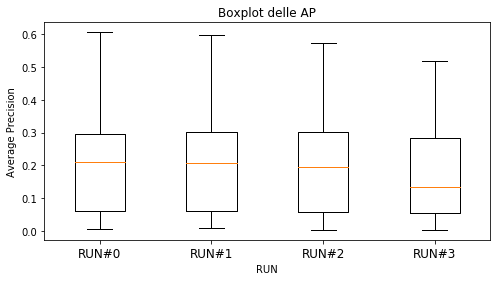

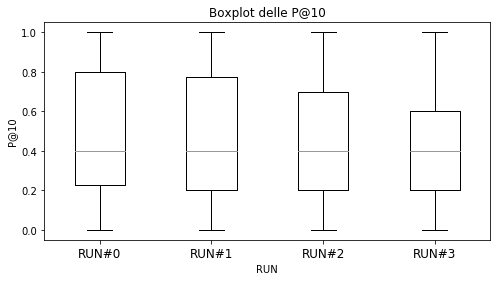

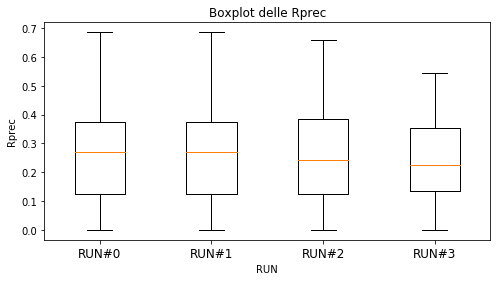

In [7]:
#viene definita la funzione boxplot che ci permette di visualizzare i dati "grezzi", prima di effettuare i test statistici
def boxplot(v1,v2,v3,v4,title,ylabel):
    #faccio un cast dei vettori a float, per poterli "plottare"
    v1=list(map(float,v1))
    v2=list(map(float,v2))
    v3=list(map(float,v3))
    v4=list(map(float,v4))
    fig,ax = plt.subplots()
    #definisco i label e il titolo
    plt.xlabel("RUN")
    plt.ylabel(ylabel)
    ax.set_title(title)
    #uso la funzione boxplot di matplotlib
    ax.boxplot([v1,v2,v3,v4],showfliers=False)
    ax.set_xticklabels(["RUN#0","RUN#1","RUN#2","RUN#3"],fontsize=12)
    plt.show()
    
boxplot(mapBM250, mapTDF1, mapBM252, mapTDF3,"Boxplot delle AP","Average Precision")
boxplot(p10BM250, p10TDF1, p10BM252, p10TDF3,"Boxplot delle P@10","P@10")
boxplot(rprecBM250, rprecTDF1, rprecBM252, rprecTDF3,"Boxplot delle Rprec","Rprec")

       Multiple Comparison of Means - Tukey HSD,FWER=0.05       
     group1           group2      meandiff  lower  upper  reject
----------------------------------------------------------------
RUN 1 map BM250   RUN 2 map TDF1  -0.0005  -0.0865 0.0855 False 
RUN 1 map BM250  RUN 3 map BM252  -0.0018  -0.0877 0.0842 False 
RUN 1 map BM250   RUN 4 map TDF3  -0.0251  -0.1111 0.0609 False 
 RUN 2 map TDF1  RUN 3 map BM252  -0.0012  -0.0872 0.0848 False 
 RUN 2 map TDF1   RUN 4 map TDF3  -0.0246  -0.1106 0.0614 False 
RUN 3 map BM252   RUN 4 map TDF3  -0.0233  -0.1093 0.0626 False 
----------------------------------------------------------------
       Multiple Comparison of Means - Tukey HSD,FWER=0.05       
     group1           group2      meandiff  lower  upper  reject
----------------------------------------------------------------
RUN 1 map BM250   RUN 2 map TDF1   -0.004  -0.1572 0.1492 False 
RUN 1 map BM250  RUN 3 map BM252   -0.01   -0.1632 0.1432 False 
RUN 1 map BM250   RUN 4 m

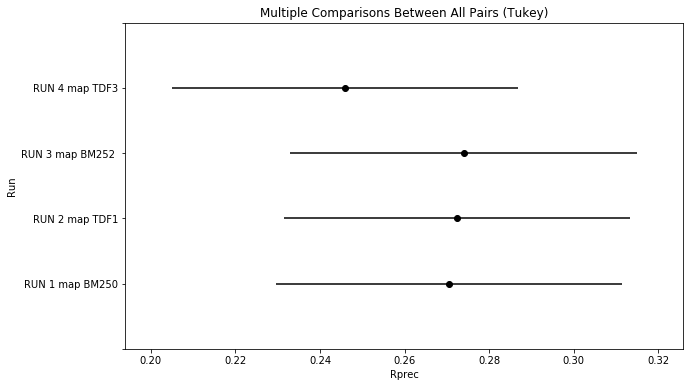

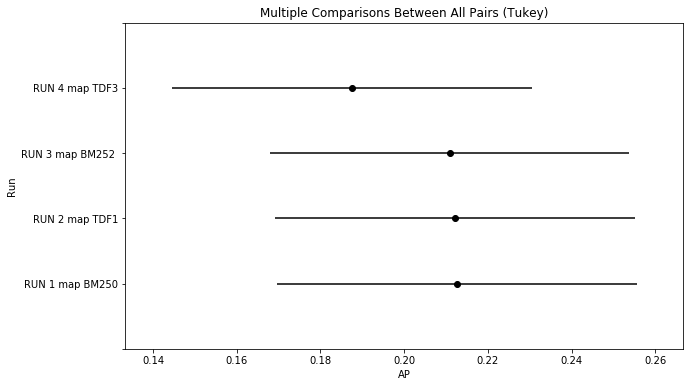

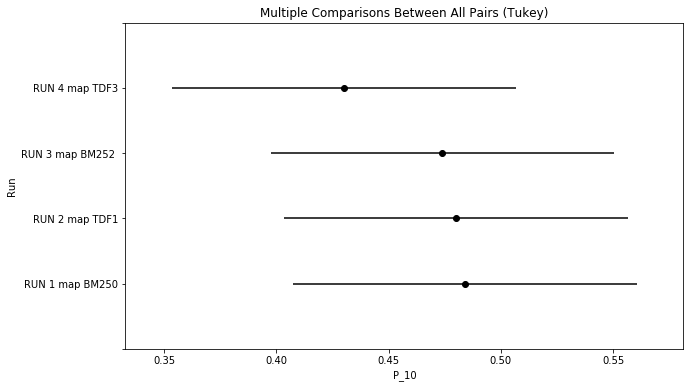

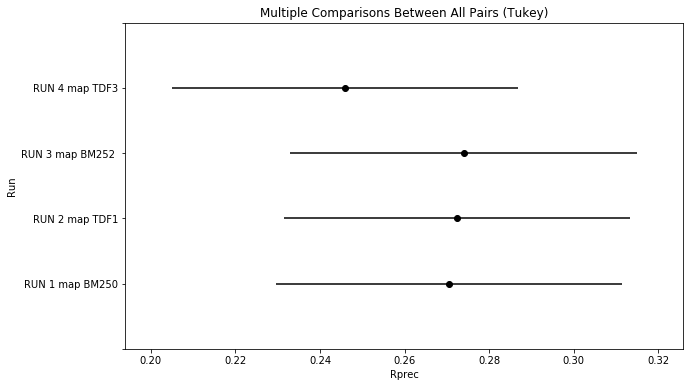

In [4]:
#conduco il TukeyHSD test
modelliM=np.concatenate([mapBM250, mapTDF1, mapBM252, mapTDF3])
mMDate = MultiComparison(modelliM.astype('float'), runID)
ResultsM = mMDate.tukeyhsd(alpha)
print(ResultsM)
ResultsM.plot_simultaneous(xlabel="AP", ylabel="Run")

#conduco il TukeyHSD test
modelliP=np.concatenate([p10BM250, p10TDF1, p10BM252, p10TDF3])
mMDate = MultiComparison(modelliP.astype('float'), runID)
ResultsP = mMDate.tukeyhsd(alpha)
print(ResultsP)
ResultsP.plot_simultaneous(xlabel="P_10", ylabel="Run")

#conduco il TukeyHSD test
modelliR=np.concatenate([rprecBM250, rprecTDF1, rprecBM252, rprecTDF3])
mMDate = MultiComparison(modelliR.astype('float'), runID)
ResultsR = mMDate.tukeyhsd(alpha)
print(ResultsR)
ResultsR.plot_simultaneous(xlabel="Rprec", ylabel="Run")

╒══════════╤════════╤════════════════╤═════════╕
│ RUN ID   │    MAP │   Precision@10 │   Rprec │
╞══════════╪════════╪════════════════╪═════════╡
│ RUN 1    │ 0.2126 │          0.484 │  0.2705 │
├──────────┼────────┼────────────────┼─────────┤
│ RUN 2    │ 0.212  │          0.48  │  0.2725 │
├──────────┼────────┼────────────────┼─────────┤
│ RUN 3    │ 0.2108 │          0.474 │  0.274  │
├──────────┼────────┼────────────────┼─────────┤
│ RUN 4    │ 0.1875 │          0.43  │  0.246  │
╘══════════╧════════╧════════════════╧═════════╛


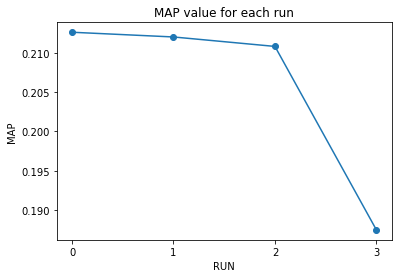

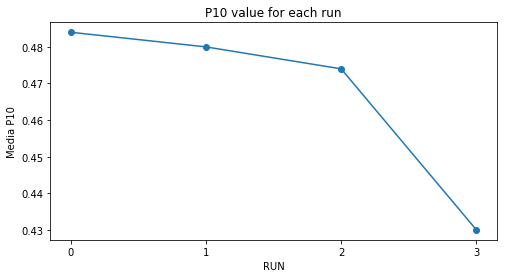

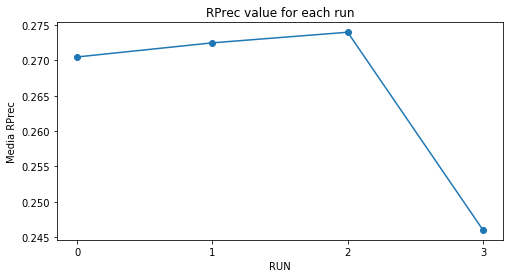

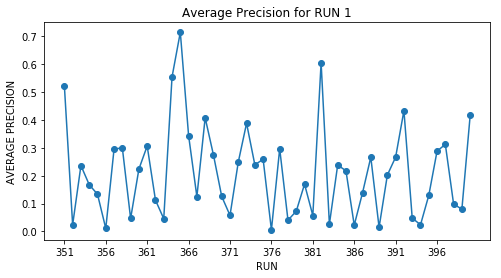

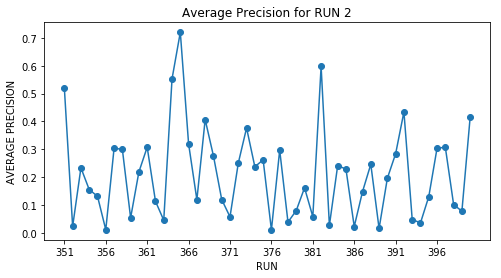

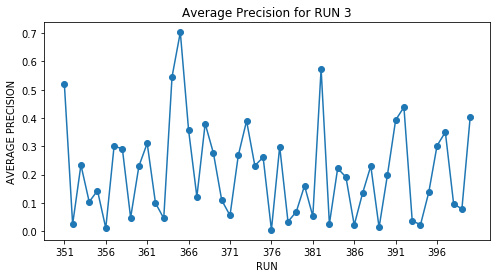

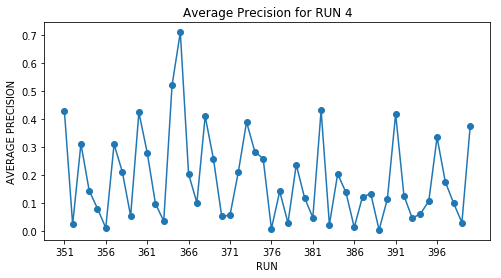

In [5]:
def plot(array,ylabel,xlabel,title,yvalues,x):
    measures=list(map(float,array))
    plt.plot(x,measures,marker="o")
    plt.title(title)
    plt.xlabel("RUN",fontsize=10)
    plt.xticks(yvalues)
    plt.rc('xtick', labelsize=10) 
    plt.rc('ytick', labelsize=10) 
    plt.ylabel(ylabel,fontsize=10)
    plt.rcParams["figure.figsize"] = [8.0,4.0]
    plt.show()

from tabulate import tabulate

table = [["RUN 1",mapaBM250[0], p10aBM250[0], rprecaBM250[0]],["RUN 2",mapaTDF1[0], p10aTDF1[0], rprecaTDF1[0]],["RUN 3",mapaBM252[0], p10aBM252[0], rprecaBM252[0]],["RUN 4",mapaTDF3[0], p10aTDF3[0], rprecaTDF3[0]]]
print(tabulate(table, headers=["RUN ID","MAP","Precision@10","Rprec"],tablefmt="fancy_grid"))

#concateno le map
maps=[mapaBM250[0], mapaTDF1[0], mapaBM252[0], mapaTDF3[0]]
#concateno i p10
p10=[p10aBM250[0], p10aTDF1[0], p10aBM252[0], p10aTDF3[0]]
#concateno le rprec
rp=[rprecaBM250[0], rprecaTDF1[0], rprecaBM252[0], rprecaTDF3[0]]

#plotto le map delle varie RUN
plot(maps,"MAP","RUN","MAP value for each run",range(4),range(4))
#plotto i p10 delle varie RUN
plot(p10,"Media P10","RUN","P10 value for each run",range(4),range(4)) 
#plotto la rprec delle varie RUN
plot(rp,"Media RPrec","RUN","RPrec value for each run",range(4),range(4))


plot(mapBM250,"AVERAGE PRECISION","TOPICS","Average Precision for RUN 1",range(351,400,5),range(351,401))
plot(mapTDF1,"AVERAGE PRECISION","TOPICS","Average Precision for RUN 2",range(351,400,5),range(351,401))
plot(mapBM252,"AVERAGE PRECISION","TOPICS","Average Precision for RUN 3",range(351,400,5),range(351,401))
plot(mapTDF3,"AVERAGE PRECISION","TOPICS","Average Precision for RUN 4",range(351,400,5),range(351,401))

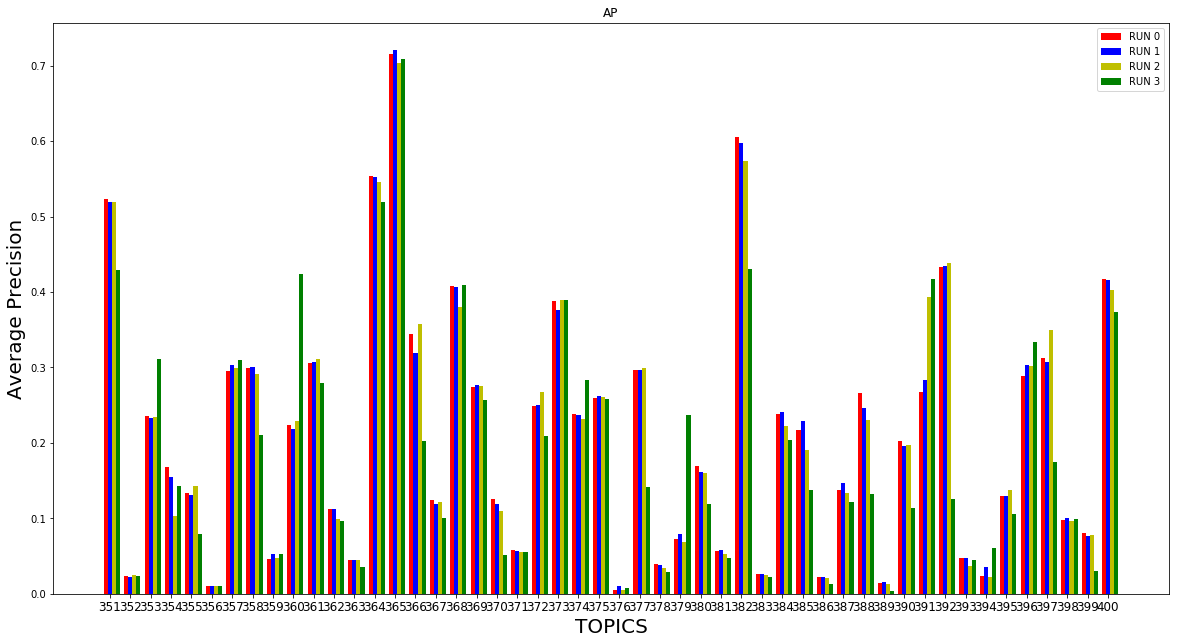

In [6]:
N = 50
ap_bm250 = list(map(float,mapBM250)) 

fig, ax = plt.subplots()
plt.xlabel("TOPICS",fontsize=20)
plt.ylabel("Average Precision",fontsize=20)

ind = np.arange(N) 
width = 0.2   
p1 = ax.bar(ind, ap_bm250, width, color='r', bottom=0,align='edge')


ap_tfidf1 = list(map(float,mapTDF1))
#(145, 149, 172, 165, 200,201)
p2 = ax.bar(ind + width, ap_tfidf1, width,
            color='b', bottom=0,align='edge')

ap_bm252 = list(map(float,mapBM252)) 
p3 = ax.bar(ind + 2*width, ap_bm252, width,
            color='y', bottom=0,align='edge')


ap_tfidf3 = list(map(float,mapTDF3))
#(145, 149, 172, 165, 200,201)
p4 = ax.bar(ind + 3*width, ap_tfidf3, width,
            color='g', bottom=0,align='edge')
ax.set_title('AP')
ax.set_xticks(ind+1.5*width)
#ax.set_xticklabels(range(351,401))
#ax.set_xscale('log')
ax.legend((p1[0], p2[0],p3[0],p4[0]), ('RUN 0', 'RUN 1','RUN 2','RUN 3'))
#ax.autoscale_view()
ax.set_xticklabels(range(351,401),fontsize=12)
fig.set_size_inches(20, 10.5)
plt.show()


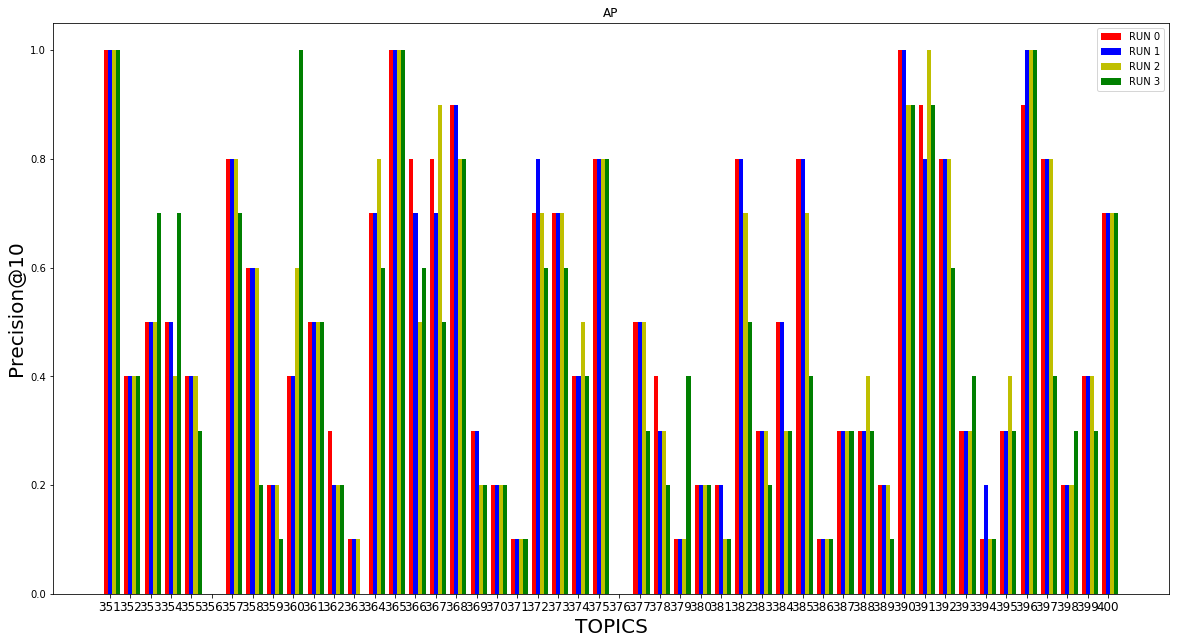

In [10]:
N = 50
p10_bm250 = list(map(float,p10BM250)) 
#(150, 160, 146, 172, 155,166)

fig, ax = plt.subplots()
plt.xlabel("TOPICS",fontsize=20)
plt.ylabel("Precision@10",fontsize=20)

ind = np.arange(N) 
width = 0.2   
p1 = ax.bar(ind, p10_bm250, width, color='r', bottom=0,align='edge')


p10_tfidf1 = list(map(float,p10TDF1))
#(145, 149, 172, 165, 200,201)
p2 = ax.bar(ind + width, p10_tfidf1, width,
            color='b', bottom=0,align='edge')

p10_bm252 = list(map(float,p10BM252)) 
p3 = ax.bar(ind + 2*width, p10_bm252, width,
            color='y', bottom=0,align='edge')


p10_tfidf3 = list(map(float,p10TDF3))
#(145, 149, 172, 165, 200,201)
p4 = ax.bar(ind + 3*width, p10_tfidf3, width,
            color='g', bottom=0,align='edge')
ax.set_title('AP')
ax.set_xticks(ind+1.5*width)
#ax.set_xticklabels(range(351,401))
#ax.set_xscale('log')
ax.legend((p1[0], p2[0],p3[0],p4[0]), ('RUN 0', 'RUN 1','RUN 2','RUN 3'))
#ax.autoscale_view()
ax.set_xticklabels(range(351,401),fontsize=12)
fig.set_size_inches(20, 10.5)
plt.show()


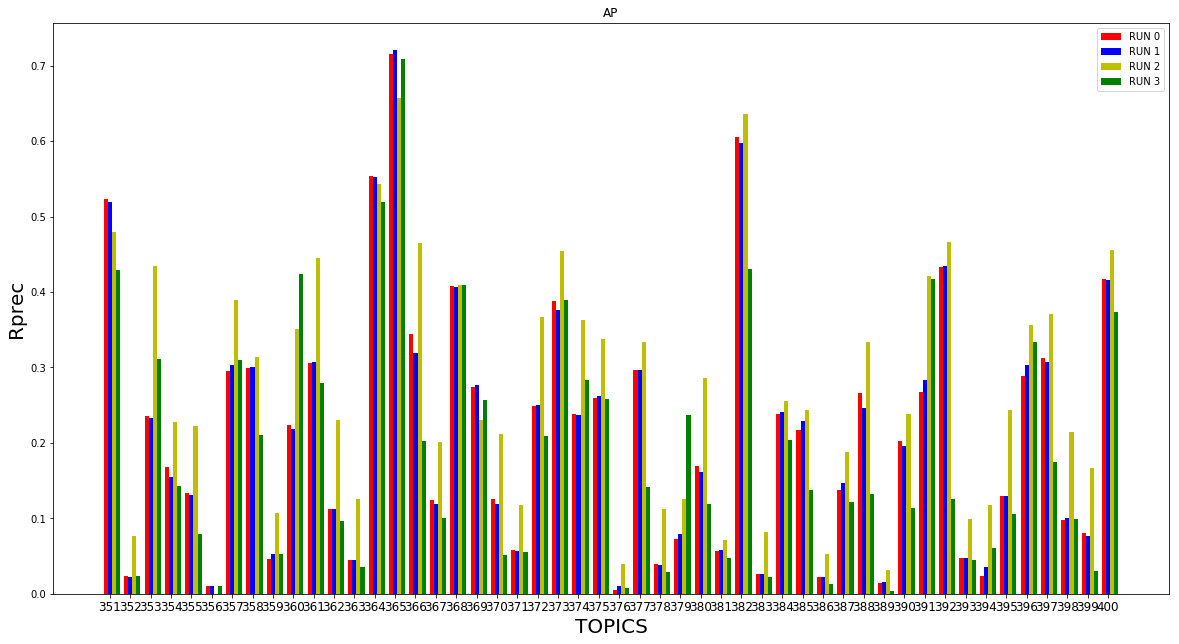

In [12]:
N = 50
rprec_bm250 = list(map(float,rprecBM250)) 
#(150, 160, 146, 172, 155,166)

fig, ax = plt.subplots()
plt.xlabel("TOPICS",fontsize=20)
plt.ylabel("Rprec",fontsize=20)

ind = np.arange(N) 
width = 0.2   
p1 = ax.bar(ind, ap_bm250, width, color='r', bottom=0,align='edge')


rprec_tfidf1 = list(map(float,rprecTDF1))
#(145, 149, 172, 165, 200,201)
p2 = ax.bar(ind + width, ap_tfidf1, width,
            color='b', bottom=0,align='edge')

rprec_bm252 = list(map(float,rprecBM252)) 
p3 = ax.bar(ind + 2*width, rprec_bm252, width,
            color='y', bottom=0,align='edge')


rprec_tfidf3 = list(map(float,rprecTDF3))
#(145, 149, 172, 165, 200,201)
p4 = ax.bar(ind + 3*width, ap_tfidf3, width,
            color='g', bottom=0,align='edge')
ax.set_title('AP')
ax.set_xticks(ind+1.5*width)
#ax.set_xticklabels(range(351,401))
#ax.set_xscale('log')
ax.legend((p1[0], p2[0],p3[0],p4[0]), ('RUN 0', 'RUN 1','RUN 2','RUN 3'))
#ax.autoscale_view()
ax.set_xticklabels(range(351,401),fontsize=12)
fig.set_size_inches(20, 10.5)
plt.show()


In [ ]:
#Si può notare dalle tabelle e dai grafici sopra riportati i risultati migliori si hanno nella RUN 0
#(modello BM25 e l'utilizzo del PorterStemmer e della Stoplis). 
#Si può osservare che, nel caso di utilizzo del modello TF_IDF, la valutazione è molto
#influenzata dalla presenza (o meno) del PorterStemmer e della stoplist, 
#RUN 3 risulta la peggiore in ogni parametro di confronto con le altre RUN.